**Optymalizacja**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Zadanie 1.**

In [2]:
# Problem parameters
n = 20
k = 50
r = np.random.uniform(0, 20, size=(k, 2))
lambda_1 = 1.0
lambda_2 = 1.0
eps = 10**-13
iter = 400

In [3]:
def F(x, r, lambda_1, lambda_2):
    result = 0
    for i in range(1, n):
        for j in range(k):
            result += lambda_1 * (1 / (eps + np.linalg.norm(x[i] - r[j])**2 ))
        result += lambda_2 * np.linalg.norm(x[i+1] - x[i])**2

    return result

In [4]:
def F_grad(x, r, lambda_1, lambda_2):
    grad = np.zeros(shape=(n+1, 2))  
    for i in range(1, n):   
        for j in range(k):
            grad[i] += -2*lambda_1 * (x[i] - r[j])/(eps + np.linalg.norm(x[i] - r[j])**2)**2

        grad[i] += 2*lambda_2 * (x[i] - x[i-1]) - 2*lambda_2 * (x[i+1] - x[i])

    return grad

In [5]:
invphi = (np.sqrt(5) - 1) / 2  # 1 / phi

def gss(f, a, b, tolerance=1e-5):
    """
    Golden-section search
    to find the minimum of f on [a,b]

    * f: a strictly unimodal function on [a,b]

    Example:
    >>> def f(x): return (x - 2) ** 2
    >>> x = gss(f, 1, 5)
    >>> print(f"{x:.5f}")
    2.00000

    """
    while abs(b - a) > tolerance:
        c = b - (b - a) * invphi
        d = a + (b - a) * invphi
        if f(c) < f(d):
            b = d
        else:  # f(c) > f(d) to find the maximum
            a = c

    return (b + a) / 2

# Source: https://en.wikipedia.org/wiki/Golden-section_search

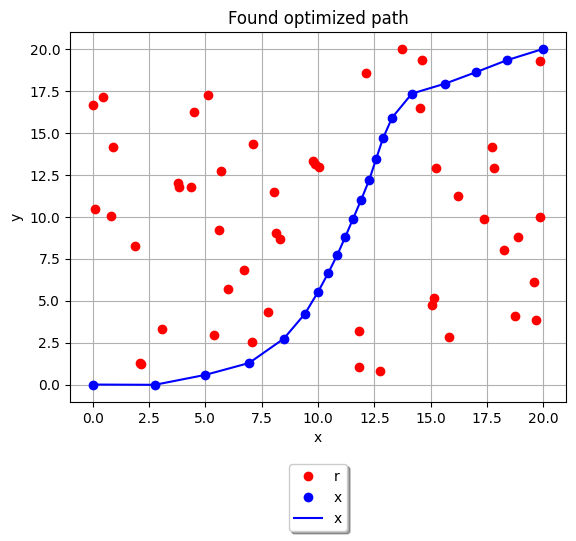

In [10]:
F_values = []

for i in range(5):
    # Random entry data
    x_0 = np.array([0, 0])
    x_n = np.array([20, 20])
    x = np.zeros(shape=(n+1, 2))
    x[:, 0] = np.random.uniform(0, 20, n+1)
    x[:, 1] = np.random.uniform(0, 20, n+1)
    x[0] = x_0
    x[n] = x_n


    # Procedure
    for j in range(iter):
        grad = F_grad(x, r, lambda_1, lambda_2)
        
        alpha = gss(lambda alpha: F(x - alpha*grad, r, lambda_1, lambda_2), 0, 1) 
        
        x -= alpha * grad
        if i == 0:
            F_values += [F(x, r, lambda_1, lambda_2)]

    plt.plot(r[:, 0], r[:, 1], 'o', color='red', label='r')
    plt.plot(x[:, 0], x[:, 1], 'o', color='blue', label='x')
    plt.plot(x[:, 0], x[:, 1], color='blue', label='x')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Found optimized path')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
            fancybox=True, shadow=True, ncol=1)
    plt.grid(True)
    plt.show()


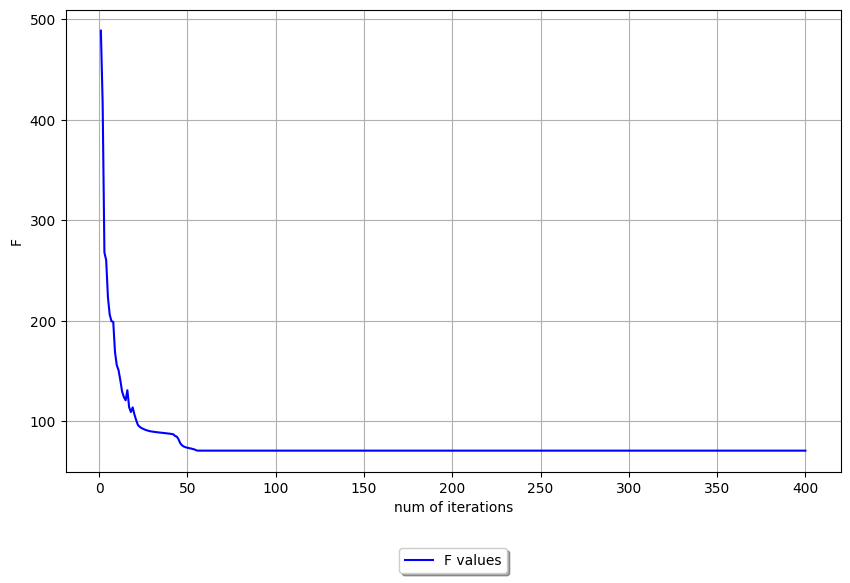

[488.6715809856311, 416.7460214108792, 267.93809499860197, 260.3249044451248, 223.19269503174613, 206.06844344587913, 199.57689261784134, 198.9133029672417, 168.70497322659583, 155.82271242365016, 150.8696123885701, 141.03024354923278, 129.6792016089536, 124.1958166127454, 120.86926329248189, 130.8996433994696, 113.9564399214142, 109.1982165772989, 113.84751231113373, 106.77827429921527, 101.0403300074836, 96.19840656728964, 94.5189199722579, 93.2500335855221, 92.43393149165188, 91.62209579046653, 90.9886101177167, 90.48894347964345, 90.06961450648544, 89.76455501692324, 89.48617181685502, 89.26310630272273, 89.04067640359298, 88.85373636293639, 88.64993786696904, 88.47252294588854, 88.26223810297212, 88.07509891643625, 87.8460206166547, 87.64042138289865, 87.3733043356106, 87.08747257921925, 85.39116958628736, 84.7725966195895, 82.03599386330103, 77.98232859478198, 76.02774934822116, 74.83961231293628, 74.13710309629352, 73.69187532845515, 73.27053023360281, 72.94225723820644, 72.3921

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, iter+1), F_values, color='blue', label='F values')
plt.xlabel('num of iterations')
plt.ylabel('F')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid(True)
plt.show()

print(F_values)